# PYTHON TASK: 
Based on the stated dataset, devise a minimum of 4 exploratory questions to be answered via association rule mining. Following that, devise a pipeline for preprocessing, mining, and knowledge evaluation, then implement the python codes for the process. Steps should include, but not limited to the following:  
1. Data Exploration (statistics and visualization) 
2. Data Preprocessing (cleaning, transformation) 
3. Data Mining (association rule mining) 
4. Knowledge evaluation (interestingness measure) 
Note:  
- You may create separate python notebooks for the tasks if necessary. 
- Please  include  a  reference  list  at  the  end  of  the  notebook(s)  of  any  tutorials,  GitHub  codes, websites, videos, etc. used for learning and reference to complete the tasks.

**INTRODUCTION:**
Association rule mining finds common patterns in data. Often used for market basket analysis to 
understand customer patterns, it is also possible to be applied on other types of datasets to find 
interesting associations and relationships between attributes. 

**OBJECTIVE:**
To perform association rule mining on higher education students’ data and find interesting 
associations.

# Problem Questions
**Exploring behavioural patterns of excelling students**
>In this context, the aim is to analyse the study habits, attendance habits, and external activities of students. Behavioural aspects can then be discerned whether they contribute significantly towards overall academic performances. Patterns that indicate success among students will shed light on effective strategies to optimise student performance.

**Does home-environment influence academic performance?**
>This question considers whether the background of a student has any influence on the academic performance outcome. It dives deeper into investigating whether a parents’ status, such as their occupation and marital status, makes a difference or if it is purely up to an individual to determine the fate of their academic outcome. The question also explores whether the educational background  of parents is  a deterrent towards better academic performance. From here, we are able to gain a nuanced understanding of  how home-related attributes shape academic success.

**What personal attributes affect a student's academic performance?**
>This question probes into a students’ current academic situation such as their current location, their salary if they possess a job, and their high school educational background. Other personal attributes such as their age and gender will also be taken into consideration to investigate how pivotal their role is towards a students’ academic performance. The  outcome of this is to possibly formulate ways to subside the negative effects and enhance the positive influence of those attributes.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing (cleaning, transformation) 

## Loading the data

In [3]:
df_raw = pd.read_csv('DATA.csv')
df_raw.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
print(df_raw.shape)
print(df_raw.dtypes)

(145, 33)
STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object


## Cleaning the data

In [5]:
# Check nulls
df_raw.isna().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

In [6]:
df_raw.drop_duplicates(inplace=True)
print(df_raw.shape)

(145, 33)


In [7]:
# Class Labels

# Student ID

# 1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
# 2- Sex (1: female, 2: male)
# 3- Graduated high-school type: (1: private, 2: state, 3: other)
# 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
# 5- Additional work: (1: Yes, 2: No)
# 6- Regular artistic or sports activity: (1: Yes, 2: No)
# 7- Do you have a partner: (1: Yes, 2: No)
# 8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
# 9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
# 10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
# 11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
# 14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
# 15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
# 16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
# 17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
# 18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
# 21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
# 22- Attendance to classes (1: always, 2: sometimes, 3: never)
# 23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
# 24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
# 25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
# 26- Listening in classes: (1: never, 2: sometimes, 3: always)
# 27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
# 28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
# 29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 31- Course ID
# 32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [8]:
# Rename cols
dict_header = {'1': 'AGE', '2': 'GENDER', '3': 'HS_TYPE', '4': 'SCHOLARSHIP', '5': 'WORK', '6': 'ACTIVITY', '7': 'PARTNER', '8': 'SALARY', '9': 'TRANSPORT', '10': 'ACCOMODATION',
               '11': 'MOTHER_EDUCATION', '12': 'FATHER_EDUCATION', '13': 'SIBLINGS', '14': 'PARENTAL_STATUS', '15': 'MOTHER_JOB', '16': 'FATHER_JOB',
               '17': 'STUDY_HOURS', '18': 'READING_NONSCI', '19': 'READING_SCI',
               '20': 'ATTENDANCE_SEMINAR', '21': 'IMPACT', '22': 'ATTENDANCE_CLASS',
               '23': 'MIDTERM_PEOPLE', '24': 'MIDTERM_TIME',
               '25': 'CLASS_NOTES', '26': 'CLASS_LISTENING', '27': 'DISCUSSION', '28': 'FLIP_CLASSROOM', '29': 'CGPA_PREV', '30': 'CGPA_EXPECTED'}

In [9]:
# Renaming
dict_data = {
    'AGE': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'GENDER': {
        1: 'Female',
        2: 'Male'
    },
    'HS_TYPE': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'SCHOLARSHIP': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'WORK': {
        1: 'Yes',
        2: 'No'
    },
    'ACTIVITY': {
        1: 'Yes',
        2: 'No'
    },
    'PARTNER': {
        1: 'Yes',
        2: 'No'
    },
    'SALARY': {
        1: 'USD 135-200',
        2: 'USD 201-270',
        3: 'USD 271-340',
        4: 'USD 341-410',
        5: 'Above 410'
    },
    'TRANSPORT': {
        1: 'Bus',
        2: 'Private Car/Taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'ACCOMODATION': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'MOTHER_EDUCATION': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'FATHER_EDUCATION': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    }, 
    'SIBLINGS': {
        1: '1',
        2: '2',
        3: '3',
        4: '4',
        5: '5 or above'
    },
    'PARENTAL_STATUS': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'MOTHER_JOB': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'FATHER_JOB': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'STUDY_HOURS': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'READING_NONSCI': {
        1: 'None',
        2: 'Sometimes',
        3: 'Often'
    },
    'READING_SCI': {
        1: 'None',
        2: 'Sometimes',
        3: 'Often'
    },
    'ATTENDANCE_SEMINAR': {
        1: 'Yes',
        2: 'No'
    },
    'IMPACT': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'ATTENDANCE_CLASS': {
        1: 'Always',
        2: 'Sometimes',
        3: 'Never'
    },
    'MIDTERM_PEOPLE': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'MIDTERM_TIME': {
        1: 'Closest date to the exam',
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'CLASS_NOTES': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'CLASS_LISTENING': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'DISCUSSION': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'FLIP_CLASSROOM':{
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'CGPA_PREV': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'CGPA_EXPECTED': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'GRADE': {
        0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'
    }
}

In [10]:
df_rename = df_raw.copy()
df_rename.rename(columns=dict_header, inplace=True)

df_raw_clean = df_raw.copy()
df_raw_clean.rename(columns=dict_header, inplace=True)

for col, mapping in dict_data.items():
    df_rename[col] = df_rename[col].map(mapping)

display(df_rename.head())
display(df_raw_clean.head())

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,Male,State,50%,No,No,No,USD 201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,USD 201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,USD 271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,DD


,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [11]:
df_rename.nunique()

STUDENT ID            145
AGE                     3
GENDER                  2
HS_TYPE                 3
SCHOLARSHIP             5
WORK                    2
ACTIVITY                2
PARTNER                 2
SALARY                  5
TRANSPORT               4
ACCOMODATION            4
MOTHER_EDUCATION        6
FATHER_EDUCATION        6
SIBLINGS                5
PARENTAL_STATUS         3
MOTHER_JOB              5
FATHER_JOB              5
STUDY_HOURS             5
READING_NONSCI          3
READING_SCI             3
ATTENDANCE_SEMINAR      2
IMPACT                  3
ATTENDANCE_CLASS        2
MIDTERM_PEOPLE          3
MIDTERM_TIME            3
CLASS_NOTES             3
CLASS_LISTENING         3
DISCUSSION              3
FLIP_CLASSROOM          3
CGPA_PREV               5
CGPA_EXPECTED           4
COURSE ID               9
GRADE                   8
dtype: int64

# Data Exploration (statistics and visualization) 

In [12]:
# styling the plot outputs

sns.set_palette("gist_earth")
sns.set_style('darkgrid')
colours_list = ["viridis", "rocket", 'mako']

In [13]:
df = df_rename.copy()

In [14]:
df.to_csv('data_clean.csv', index=False)

In [15]:
df

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,Male,State,50%,No,No,No,USD 201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,USD 201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,USD 271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,Female,State,50%,Yes,Yes,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Sometimes,Never,Sometimes,Not useful,2.50-2.99,2.50-2.99,9,BB
141,STUDENT142,18-21,Female,State,75%,No,No,No,USD 135-200,Other,...,Alone,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,Above 3.49,2.50-2.99,9,BB
142,STUDENT143,18-21,Female,Private,75%,No,No,No,USD 135-200,Bus,...,Alone,Closest date to the exam,Always,Always,Sometimes,Not useful,3.00-3.49,2.50-2.99,9,DD
143,STUDENT144,22-25,Female,State,75%,Yes,Yes,Yes,Above 410,Private Car/Taxi,...,With friends,Closest date to the exam,Sometimes,Never,Sometimes,Not useful,Above 3.49,2.50-2.99,9,CB


In [16]:
df.describe()

,COURSE ID
count,145.000000
mean,4.131034
std,3.260145
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,9.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STUDENT ID          145 non-null    object
 1   AGE                 145 non-null    object
 2   GENDER              145 non-null    object
 3   HS_TYPE             145 non-null    object
 4   SCHOLARSHIP         145 non-null    object
 5   WORK                145 non-null    object
 6   ACTIVITY            145 non-null    object
 7   PARTNER             145 non-null    object
 8   SALARY              145 non-null    object
 9   TRANSPORT           145 non-null    object
 10  ACCOMODATION        145 non-null    object
 11  MOTHER_EDUCATION    145 non-null    object
 12  FATHER_EDUCATION    145 non-null    object
 13  SIBLINGS            145 non-null    object
 14  PARENTAL_STATUS     145 non-null    object
 15  MOTHER_JOB          145 non-null    object
 16  FATHER_JOB          145 no

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

<Axes: >

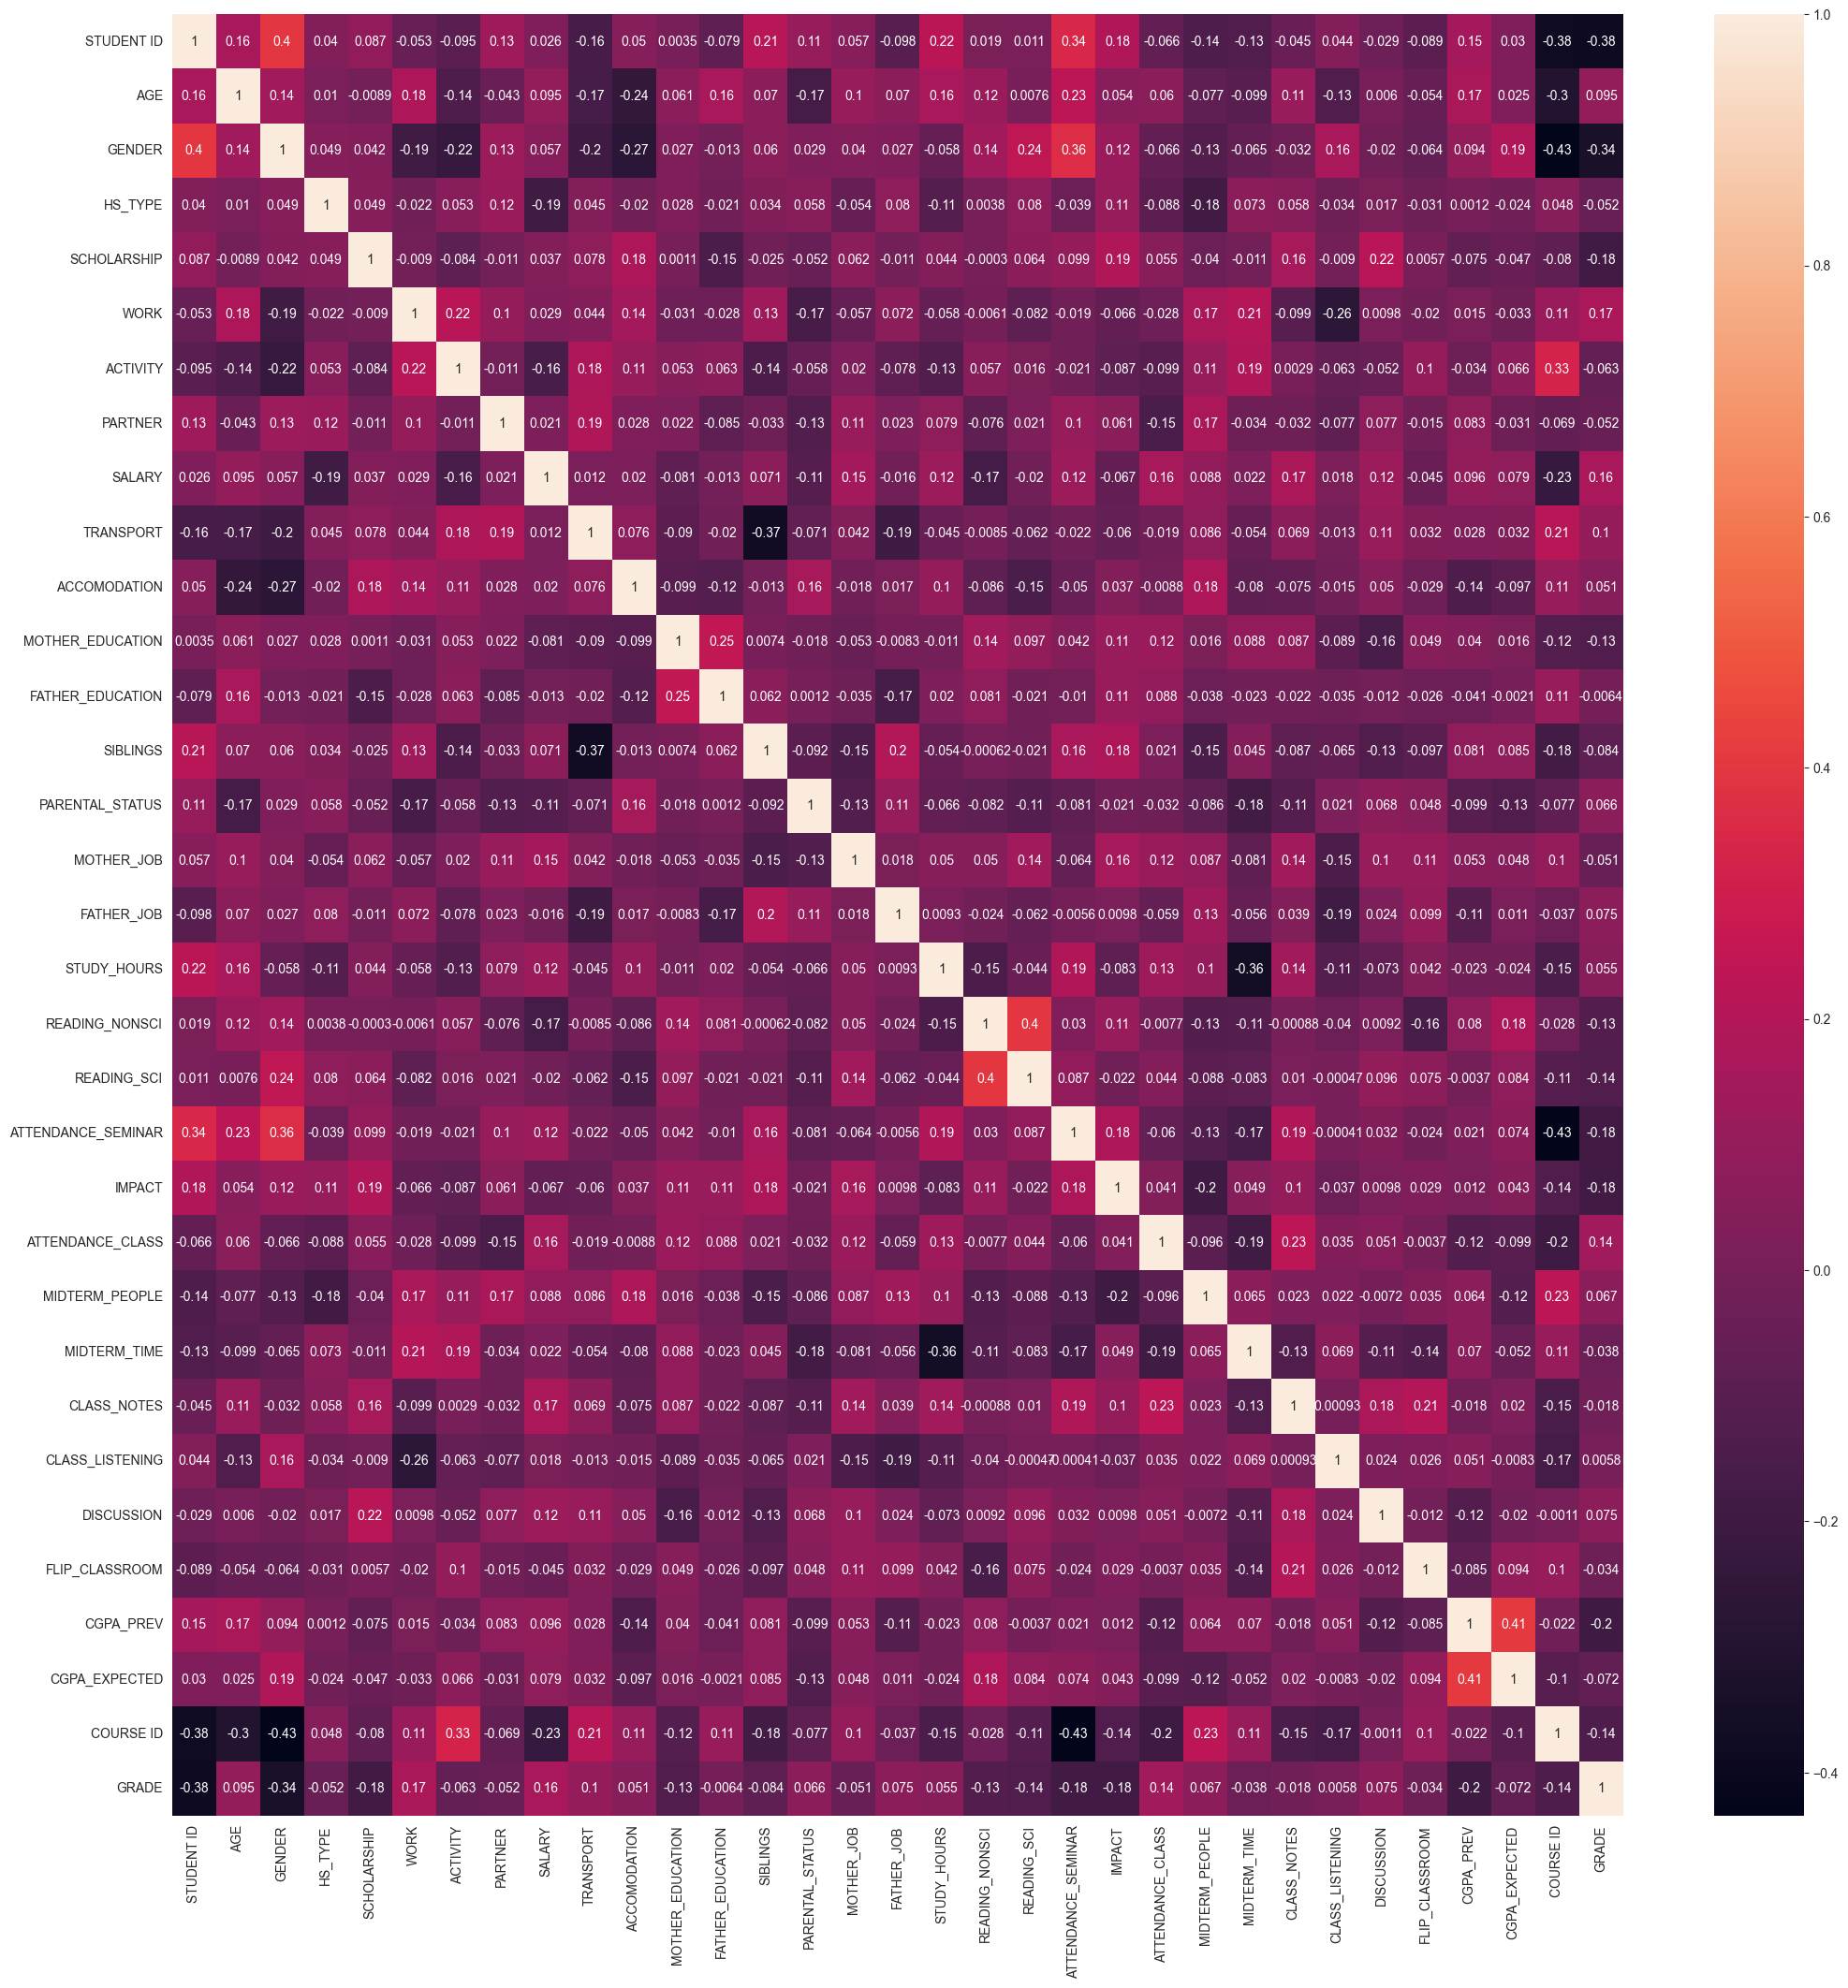

In [20]:
corrmat = df_encoded.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corrmat, annot=True)

In [21]:
corrseries = corrmat.unstack()
corrsort = corrseries.sort_values(ascending=False)

print('Top 10 correlations')
print(corrsort[df.shape[1]- 1:].head(20))

print('----------------------------------------------------------------')

print('Bottom 10 correlations')
print(corrsort[df.shape[1] - 1:].tail(20))

Top 10 correlations
GRADE               GRADE                 1.000000
CGPA_EXPECTED       CGPA_PREV             0.410884
CGPA_PREV           CGPA_EXPECTED         0.410884
GENDER              STUDENT ID            0.398545
STUDENT ID          GENDER                0.398545
READING_NONSCI      READING_SCI           0.397217
READING_SCI         READING_NONSCI        0.397217
ATTENDANCE_SEMINAR  GENDER                0.363971
GENDER              ATTENDANCE_SEMINAR    0.363971
ATTENDANCE_SEMINAR  STUDENT ID            0.342806
STUDENT ID          ATTENDANCE_SEMINAR    0.342806
COURSE ID           ACTIVITY              0.326711
ACTIVITY            COURSE ID             0.326711
MOTHER_EDUCATION    FATHER_EDUCATION      0.245914
FATHER_EDUCATION    MOTHER_EDUCATION      0.245914
GENDER              READING_SCI           0.238027
READING_SCI         GENDER                0.238027
MIDTERM_PEOPLE      COURSE ID             0.230501
COURSE ID           MIDTERM_PEOPLE        0.230501
ATTENDANCE_

In [22]:
poscor = corrsort['CGPA_EXPECTED'][corrsort['CGPA_EXPECTED'] > 0].index.tolist()
display(poscor)
display(len(poscor))
corrsort['CGPA_EXPECTED']

['CGPA_EXPECTED',
 'CGPA_PREV',
 'GENDER',
 'READING_NONSCI',
 'FLIP_CLASSROOM',
 'SIBLINGS',
 'READING_SCI',
 'SALARY',
 'ATTENDANCE_SEMINAR',
 'ACTIVITY',
 'MOTHER_JOB',
 'IMPACT',
 'TRANSPORT',
 'STUDENT ID',
 'AGE',
 'CLASS_NOTES',
 'MOTHER_EDUCATION',
 'FATHER_JOB']

18

CGPA_EXPECTED         1.000000
CGPA_PREV             0.410884
GENDER                0.188768
READING_NONSCI        0.177529
FLIP_CLASSROOM        0.093714
SIBLINGS              0.084627
READING_SCI           0.084041
SALARY                0.079437
ATTENDANCE_SEMINAR    0.073953
ACTIVITY              0.065919
MOTHER_JOB            0.048430
IMPACT                0.042947
TRANSPORT             0.032124
STUDENT ID            0.029984
AGE                   0.025266
CLASS_NOTES           0.020069
MOTHER_EDUCATION      0.016372
FATHER_JOB            0.011093
FATHER_EDUCATION     -0.002111
CLASS_LISTENING      -0.008254
DISCUSSION           -0.020182
HS_TYPE              -0.023775
STUDY_HOURS          -0.024017
PARTNER              -0.031170
WORK                 -0.032746
SCHOLARSHIP          -0.046518
MIDTERM_TIME         -0.052368
GRADE                -0.072178
ACCOMODATION         -0.097155
ATTENDANCE_CLASS     -0.099360
COURSE ID            -0.101985
MIDTERM_PEOPLE       -0.118950
PARENTAL

In [23]:
poscor = corrsort['GRADE'][corrsort['GRADE'] > 0].index.tolist()
display(poscor)
display(len(poscor))
corrsort['GRADE']

['GRADE',
 'WORK',
 'SALARY',
 'ATTENDANCE_CLASS',
 'TRANSPORT',
 'AGE',
 'FATHER_JOB',
 'DISCUSSION',
 'MIDTERM_PEOPLE',
 'PARENTAL_STATUS',
 'STUDY_HOURS',
 'ACCOMODATION',
 'CLASS_LISTENING']

13

GRADE                 1.000000
WORK                  0.167445
SALARY                0.161555
ATTENDANCE_CLASS      0.139564
TRANSPORT             0.100657
AGE                   0.095251
FATHER_JOB            0.074529
DISCUSSION            0.074523
MIDTERM_PEOPLE        0.067173
PARENTAL_STATUS       0.066379
STUDY_HOURS           0.055476
ACCOMODATION          0.051443
CLASS_LISTENING       0.005800
FATHER_EDUCATION     -0.006362
CLASS_NOTES          -0.017560
FLIP_CLASSROOM       -0.033618
MIDTERM_TIME         -0.038303
MOTHER_JOB           -0.050724
PARTNER              -0.051778
HS_TYPE              -0.052168
ACTIVITY             -0.062993
CGPA_EXPECTED        -0.072178
SIBLINGS             -0.084470
READING_NONSCI       -0.126186
MOTHER_EDUCATION     -0.134299
READING_SCI          -0.135774
COURSE ID            -0.142166
SCHOLARSHIP          -0.183314
IMPACT               -0.184418
ATTENDANCE_SEMINAR   -0.184763
CGPA_PREV            -0.196715
GENDER               -0.335533
STUDENT 

C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\1578330595.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(x = df[col])


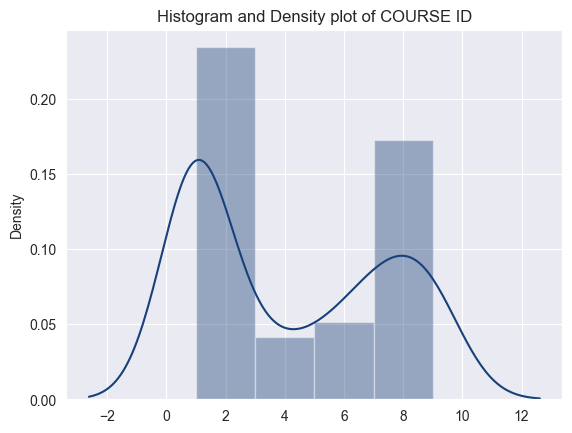

In [24]:
for col in df.select_dtypes(include='number'):
  fig = sns.distplot(x = df[col])
  fig.set(title=f'Histogram and Density plot of {col}')
  plt.show()

In [25]:
for col in df:
    print('Unique values for ', col)
    print(df[col].unique())
    print('--------------------------------')

Unique values for  STUDENT ID
['STUDENT1' 'STUDENT2' 'STUDENT3' 'STUDENT4' 'STUDENT5' 'STUDENT6'
 'STUDENT7' 'STUDENT8' 'STUDENT9' 'STUDENT10' 'STUDENT11' 'STUDENT12'
 'STUDENT13' 'STUDENT14' 'STUDENT15' 'STUDENT16' 'STUDENT17' 'STUDENT18'
 'STUDENT19' 'STUDENT20' 'STUDENT21' 'STUDENT22' 'STUDENT23' 'STUDENT24'
 'STUDENT25' 'STUDENT26' 'STUDENT27' 'STUDENT28' 'STUDENT29' 'STUDENT30'
 'STUDENT31' 'STUDENT32' 'STUDENT33' 'STUDENT34' 'STUDENT35' 'STUDENT36'
 'STUDENT37' 'STUDENT38' 'STUDENT39' 'STUDENT40' 'STUDENT41' 'STUDENT42'
 'STUDENT43' 'STUDENT44' 'STUDENT45' 'STUDENT46' 'STUDENT47' 'STUDENT48'
 'STUDENT49' 'STUDENT50' 'STUDENT51' 'STUDENT52' 'STUDENT53' 'STUDENT54'
 'STUDENT55' 'STUDENT56' 'STUDENT57' 'STUDENT58' 'STUDENT59' 'STUDENT60'
 'STUDENT61' 'STUDENT62' 'STUDENT63' 'STUDENT64' 'STUDENT65' 'STUDENT66'
 'STUDENT67' 'STUDENT68' 'STUDENT69' 'STUDENT70' 'STUDENT71' 'STUDENT72'
 'STUDENT73' 'STUDENT74' 'STUDENT75' 'STUDENT76' 'STUDENT77' 'STUDENT78'
 'STUDENT79' 'STUDENT80' 'STUD

## Exploring personal questions

In [26]:
# 1-10 of the data are the personal questions, 11-16. questions include family questions, and the remaining questions include education habits.
personal = ['STUDENT ID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'ACCOMODATION']
family = ['STUDENT ID', 'MOTHER_EDUCATION', 'FATHER_EDUCATION', 'SIBLINGS', 'PARENTAL_STATUS', 'MOTHER_JOB', 'FATHER_JOB']
edu_extra = ['STUDENT ID', 'STUDY_HOURS', 'READING_NONSCI', 'READING_SCI', 'ATTENDANCE_SEMINAR', 'IMPACT']
edu_habits = ['STUDENT ID', 'ATTENDANCE_CLASS', 'MIDTERM_PEOPLE', 'MIDTERM_TIME', 'CLASS_NOTES', 'CLASS_LISTENING', 'DISCUSSION', 'FLIP_CLASSROOM']
edu_info = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'COURSE ID', 'GRADE']

In [27]:
for col in personal[1:]:
    print('Summary for ', col)
    counts = df[col].value_counts()
    total = len(df[col])

    for name, count in counts.items():
        percentage = (count / total) * 100
        print(f'{name}: Count: {count}, Percentage: {percentage:.2f}%')

    print('-' * 50 + '\n')

Summary for  AGE
22-25: Count: 70, Percentage: 48.28%
18-21: Count: 65, Percentage: 44.83%
Above 26: Count: 10, Percentage: 6.90%
--------------------------------------------------

Summary for  GENDER
Male: Count: 87, Percentage: 60.00%
Female: Count: 58, Percentage: 40.00%
--------------------------------------------------

Summary for  HS_TYPE
State: Count: 103, Percentage: 71.03%
Private: Count: 25, Percentage: 17.24%
Other: Count: 17, Percentage: 11.72%
--------------------------------------------------

Summary for  SCHOLARSHIP
50%: Count: 76, Percentage: 52.41%
75%: Count: 42, Percentage: 28.97%
100%: Count: 23, Percentage: 15.86%
25%: Count: 3, Percentage: 2.07%
0%: Count: 1, Percentage: 0.69%
--------------------------------------------------

Summary for  WORK
No: Count: 96, Percentage: 66.21%
Yes: Count: 49, Percentage: 33.79%
--------------------------------------------------

Summary for  ACTIVITY
No: Count: 87, Percentage: 60.00%
Yes: Count: 58, Percentage: 40.00%
-------

Text(0.5, 0.98, 'Countplots for Family Attributes')

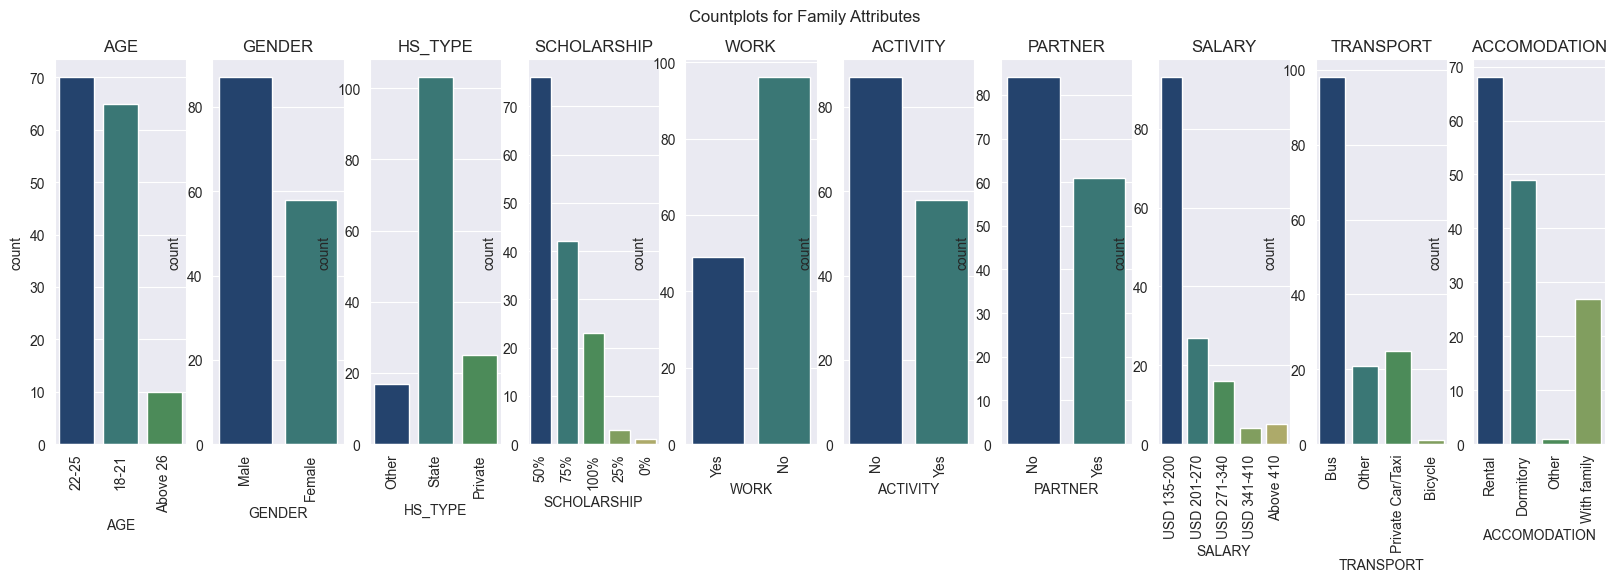

In [28]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(personal[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(personal[1:]):
    ax = sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
    # total = len(df[col])
    # print('Category: ', col)
    
    # category_labels = [label.get_text() for label in axes[i].get_xticklabels()]
    
    # for category, p in zip(category_labels, ax.patches):
    #     count = p.get_height()
    #     percentage = '{:.1f}%'.format(100 * count / total)

    #     print(f'{col} - Category: {category}, Count: {count}, Percentage: {percentage}')
    # print('-' * 50)

fig.suptitle('Countplots for Family Attributes')

C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\947999346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_co

Text(0.5, 1.01, 'Countplots for Personal Attributes based on Gender')

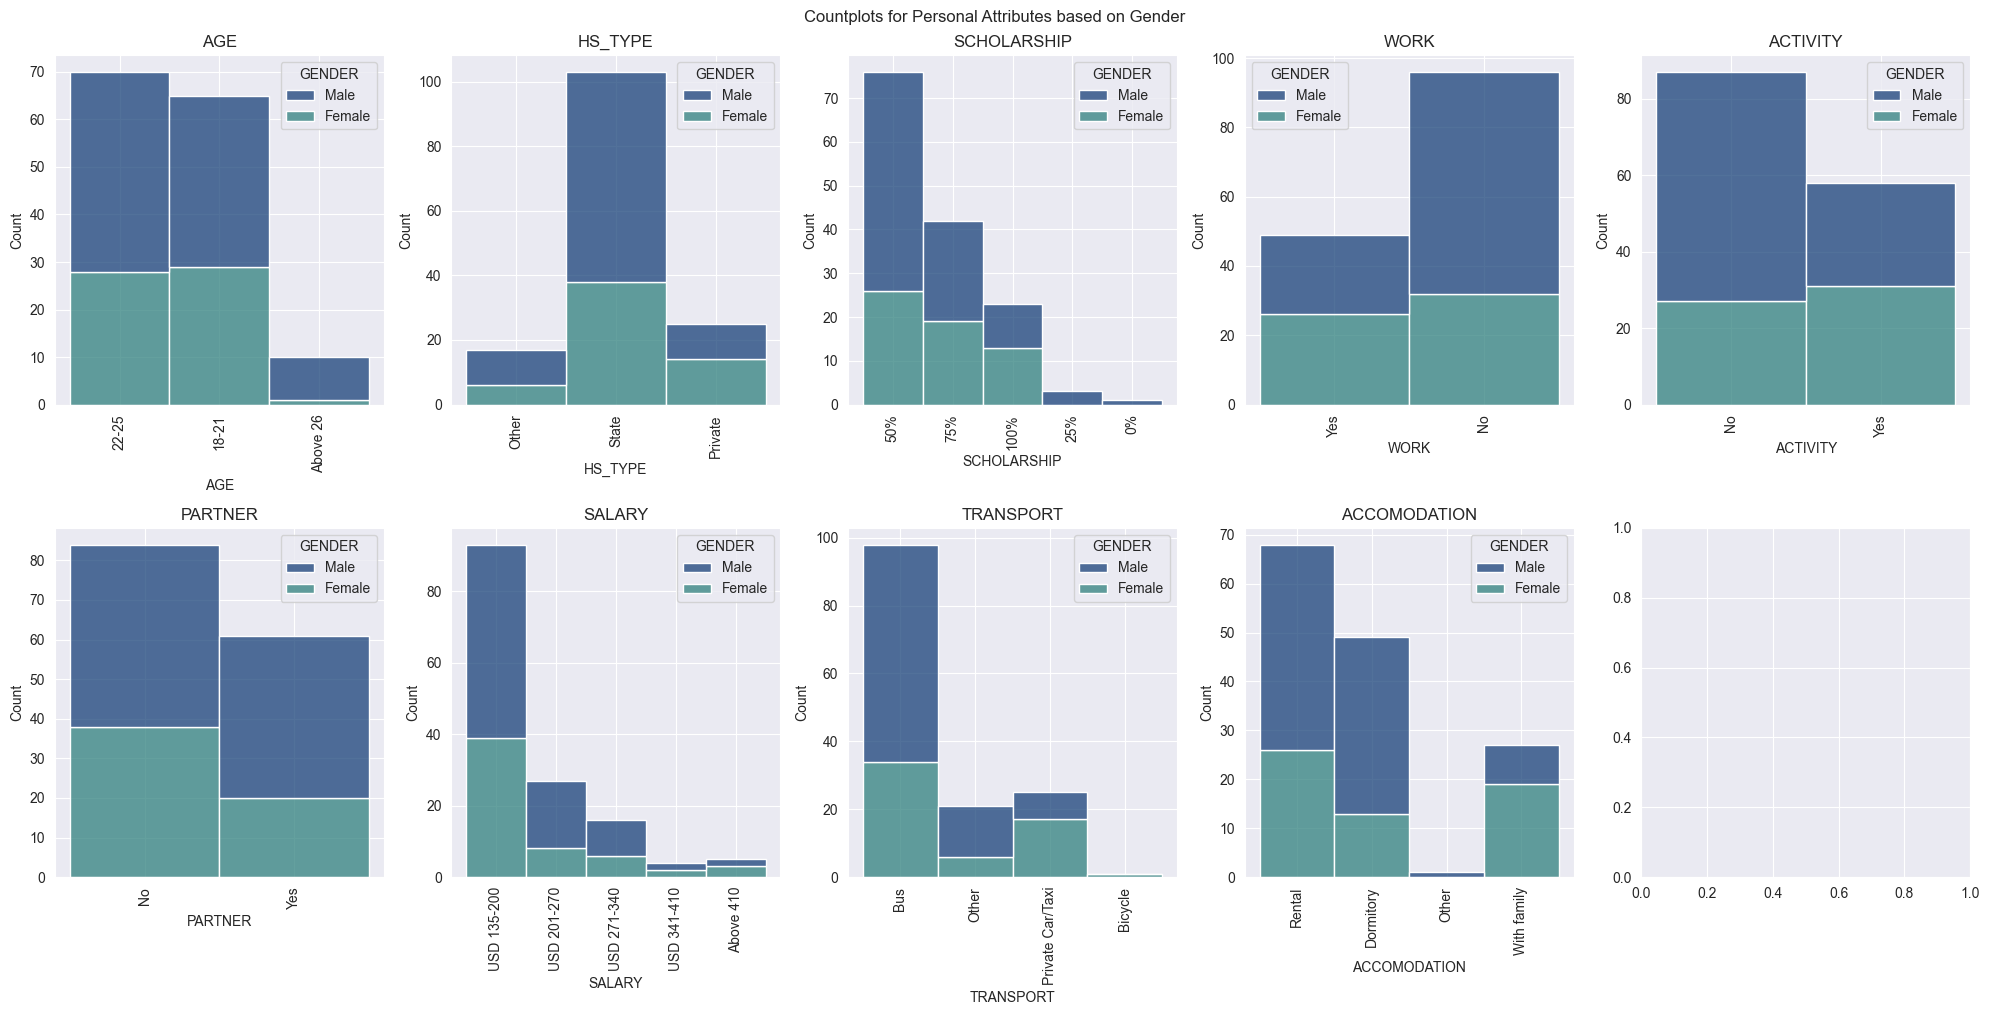

In [29]:
personal_gender = [col for col in personal[1:] if col != 'GENDER']

num_rows = 2

num_attributes = len(personal_gender)
num_cols = min(int(num_attributes / num_rows) + 1, num_attributes)  # Ensure not more columns than attributes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

for i, col in enumerate(personal_gender):
    sns.histplot(data=df, x=col, hue='GENDER', multiple='stack', ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)
    axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)

plt.tight_layout()
fig.suptitle('Countplots for Personal Attributes based on Gender', y=1.01)

C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)
C:\Users\Anis\AppData\Local\Temp\ipykernel_12900\605632413.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_co

Text(0.5, 1.01, 'Countplots for Personal Attributes based on Age')

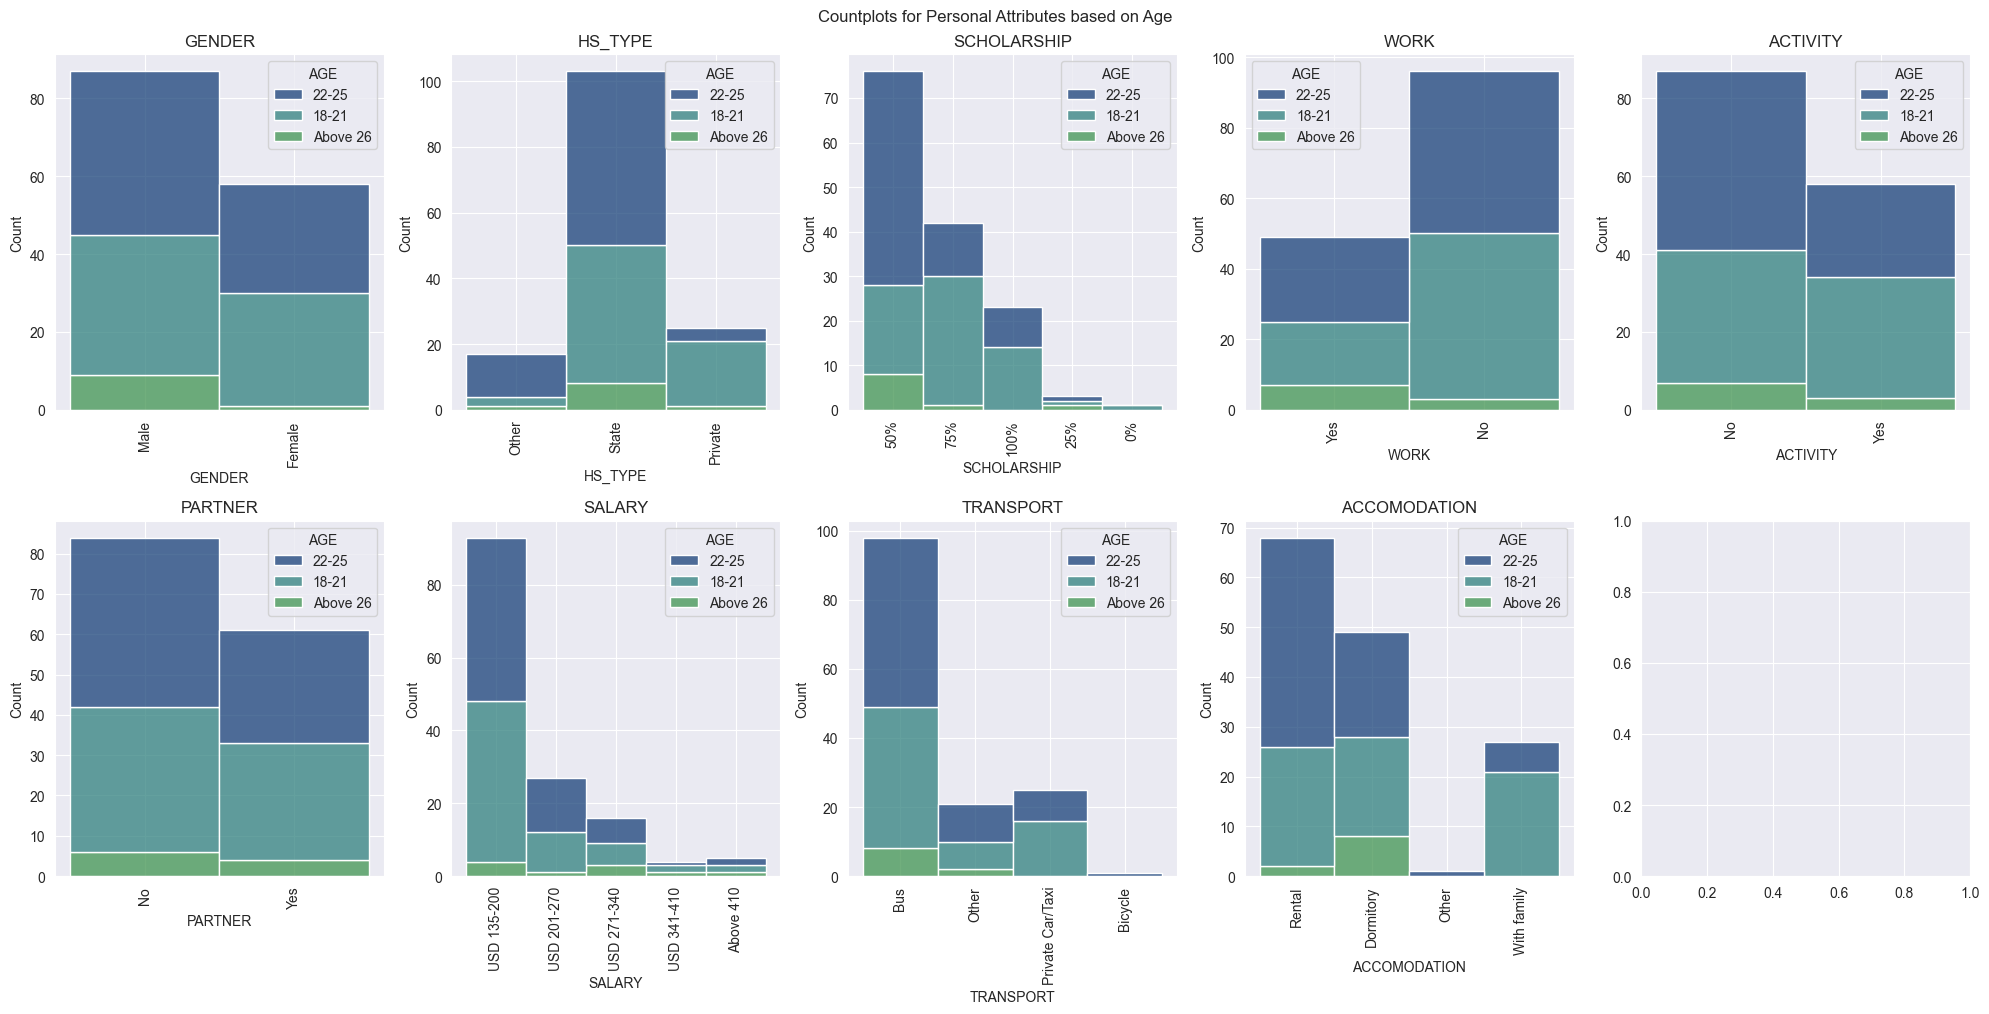

In [30]:
personal_age = [col for col in personal[1:] if col != 'AGE']

num_rows = 2

num_attributes = len(personal_age)
num_cols = min(int(num_attributes / num_rows) + 1, num_attributes)  # Ensure not more columns than attributes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

for i, col in enumerate(personal_age):
    sns.histplot(data=df, x=col, hue='AGE', multiple='stack', ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)
    axes[i // num_cols, i % num_cols].set_xticklabels(axes[i // num_cols, i % num_cols].get_xticklabels(), rotation=90)

plt.tight_layout()

fig.suptitle('Countplots for Personal Attributes based on Age', y=1.01)

## Exploring family questions

In [31]:
for col in family[1:]:
    print('Summary for ', col)
    counts = df[col].value_counts()
    total = len(df[col])

    for name, count in counts.items():
        percentage = (count / total) * 100
        print(f'{name}: Count: {count}, Percentage: {percentage:.2f}%')

    print('-' * 50 + '\n')

Summary for  MOTHER_EDUCATION
Primary school: Count: 54, Percentage: 37.24%
High school: Count: 39, Percentage: 26.90%
Secondary school: Count: 27, Percentage: 18.62%
University: Count: 21, Percentage: 14.48%
MSc.: Count: 2, Percentage: 1.38%
Ph.D.: Count: 2, Percentage: 1.38%
--------------------------------------------------

Summary for  FATHER_EDUCATION
High school: Count: 46, Percentage: 31.72%
Secondary school: Count: 36, Percentage: 24.83%
Primary school: Count: 29, Percentage: 20.00%
University: Count: 28, Percentage: 19.31%
MSc.: Count: 5, Percentage: 3.45%
Ph.D.: Count: 1, Percentage: 0.69%
--------------------------------------------------

Summary for  SIBLINGS
2: Count: 45, Percentage: 31.03%
1: Count: 27, Percentage: 18.62%
3: Count: 26, Percentage: 17.93%
5 or above: Count: 24, Percentage: 16.55%
4: Count: 23, Percentage: 15.86%
--------------------------------------------------

Summary for  PARENTAL_STATUS
Married: Count: 127, Percentage: 87.59%
Divorced: Count: 11, Pe

Text(0.5, 0.98, 'Countplots for Family Attributes')

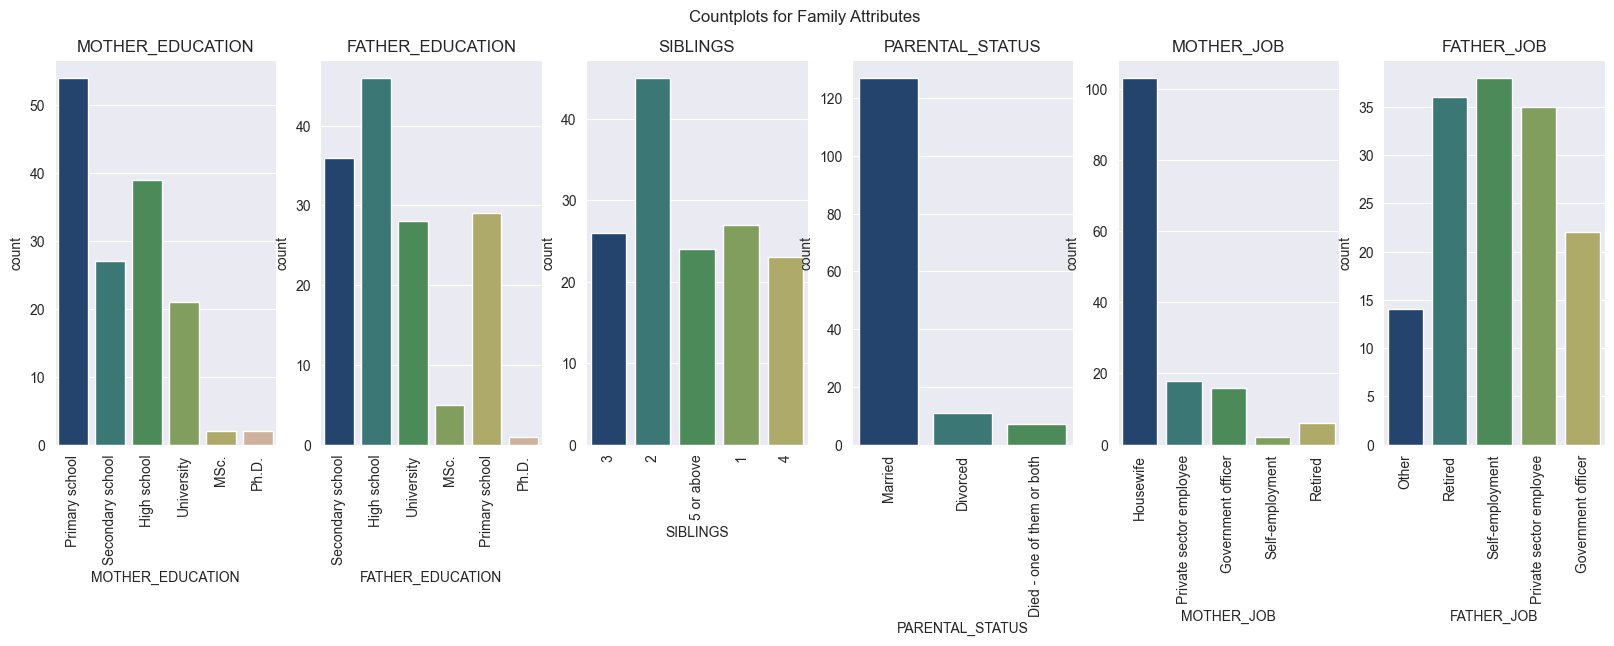

In [32]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(family[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(family[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Family Attributes')

## Exploring education questions

In [33]:
for col in edu_extra[1:]:
    print('Summary for ', col)
    counts = df[col].value_counts()
    total = len(df[col])

    for name, count in counts.items():
        percentage = (count / total) * 100
        print(f'{name}: Count: {count}, Percentage: {percentage:.2f}%')

    print('-' * 50 + '\n')

Summary for  STUDY_HOURS
<5 hours: Count: 74, Percentage: 51.03%
6-10 hours: Count: 30, Percentage: 20.69%
None: Count: 29, Percentage: 20.00%
11-20 hours: Count: 8, Percentage: 5.52%
More than 20 hours: Count: 4, Percentage: 2.76%
--------------------------------------------------

Summary for  READING_NONSCI
Sometimes: Count: 99, Percentage: 68.28%
None: Count: 27, Percentage: 18.62%
Often: Count: 19, Percentage: 13.10%
--------------------------------------------------

Summary for  READING_SCI
Sometimes: Count: 103, Percentage: 71.03%
Often: Count: 22, Percentage: 15.17%
None: Count: 20, Percentage: 13.79%
--------------------------------------------------

Summary for  ATTENDANCE_SEMINAR
Yes: Count: 114, Percentage: 78.62%
No: Count: 31, Percentage: 21.38%
--------------------------------------------------

Summary for  IMPACT
Positive: Count: 128, Percentage: 88.28%
Neutral: Count: 13, Percentage: 8.97%
Negative: Count: 4, Percentage: 2.76%
---------------------------------------

Text(0.5, 0.98, 'Countplots for Extracurricular Attributes')

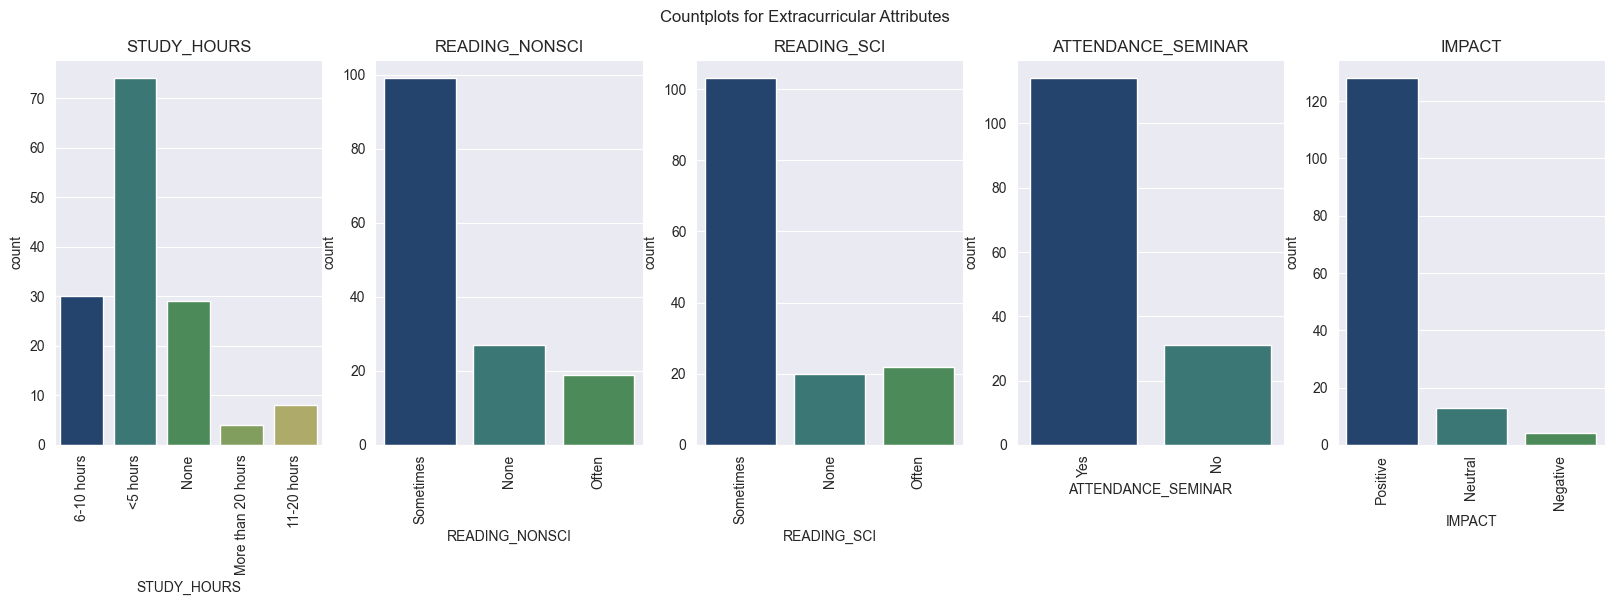

In [34]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(edu_extra[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_extra[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Extracurricular Attributes')

Text(0.5, 0.98, 'Countplots for Classroom Habits Attributes')

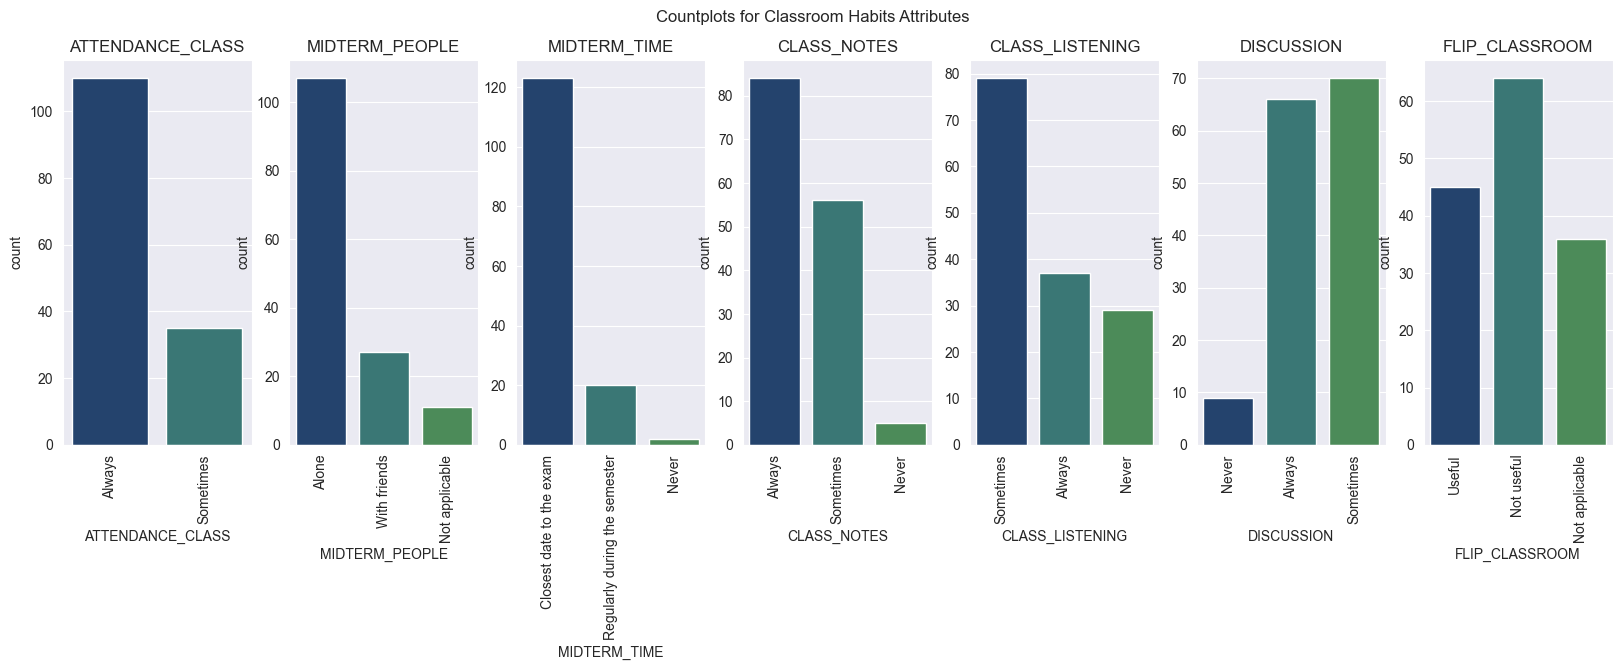

In [35]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(edu_habits[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_habits[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Classroom Habits Attributes')

Text(0.5, 0.98, 'Countplots for Grade Attributes')

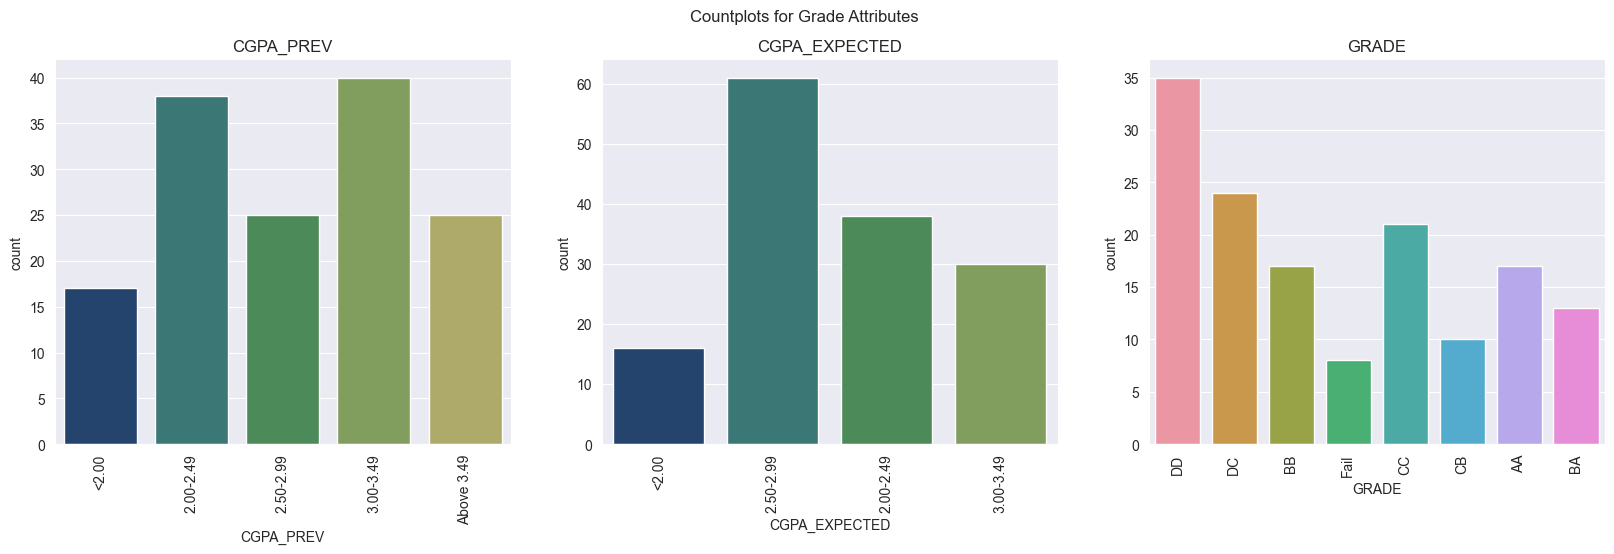

In [36]:
edu_grades = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'GRADE']
fig, axes = plt.subplots(nrows=1, ncols=len(edu_grades[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_grades[1:]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
fig.suptitle('Countplots for Grade Attributes')

# Problem Questions
**Exploring behavioural patterns of excelling students**
>In this context, the aim is to analyse the study habits, attendance habits, and external activities of students. Behavioural aspects can then be discerned whether they contribute significantly towards overall academic performances. Patterns that indicate success among students will shed light on effective strategies to optimise student performance.

**Does home-environment influence academic performance?**
>This question considers whether the background of a student has any influence on the academic performance outcome. It dives deeper into investigating whether a parents’ status, such as their occupation and marital status, makes a difference or if it is purely up to an individual to determine the fate of their academic outcome. The question also explores whether the educational background  of parents is  a deterrent towards better academic performance. From here, we are able to gain a nuanced understanding of  how home-related attributes shape academic success.

**What personal attributes affect a student's academic performance?**
>This question probes into a students’ current academic situation such as their current location, their salary if they possess a job, and their high school educational background. Other personal attributes such as their age and gender will also be taken into consideration to investigate how pivotal their role is towards a students’ academic performance. The  outcome of this is to possibly formulate ways to subside the negative effects and enhance the positive influence of those attributes.

### Excelling students - common habits

In [37]:
# looking at previous cgpa results and grades to determine 'excelling students'

display(df['CGPA_PREV'].unique())
display(df['GRADE'].unique())

array(['<2.00', '2.00-2.49', '2.50-2.99', '3.00-3.49', 'Above 3.49'],
      dtype=object)

array(['DD', 'DC', 'BB', 'Fail', 'CC', 'CB', 'AA', 'BA'], dtype=object)

In [38]:
# Taking CGPA 'Above 3.49' and grade 'AA'

CGPA_top = df[df['CGPA_PREV'] == 'Above 3.49']
GRADE_top  = df[df['GRADE'] == 'AA']
print('Count of students with previous CGPA above 3.49: ', len(CGPA_top))
print('Count of students with AA grades: ', len(GRADE_top))

students_top = pd.concat([CGPA_top, GRADE_top]).drop_duplicates().reset_index(drop=True)

# seeing which students are the same
CGPA_GRADE_top = df[(df['CGPA_PREV'] == 'Above 3.49') & (df['GRADE'] == 'AA')]
print('Count of students with previous CGPA above 3.49 and AA grades: ', len(CGPA_GRADE_top))

Count of students with previous CGPA above 3.49:  25
Count of students with AA grades:  17
Count of students with previous CGPA above 3.49 and AA grades:  2


In [39]:
CGPA_GRADE_top

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_PEOPLE,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
70,STUDENT71,18-21,Male,State,75%,No,Yes,Yes,USD 135-200,Bus,...,Alone,Closest date to the exam,Sometimes,Sometimes,Always,Not useful,Above 3.49,3.00-3.49,3,AA
84,STUDENT85,Above 26,Male,Other,50%,Yes,No,Yes,USD 271-340,Bus,...,Not applicable,Never,Always,Always,Always,Not applicable,Above 3.49,3.00-3.49,5,AA


In [40]:
students_top['TYPE_TOP'] = ''
students_top.loc[students_top['CGPA_PREV'] == 'Above 3.49', 'TYPE_TOP'] = 'CGPA Above 3.49'
students_top.loc[students_top['GRADE'] == 'AA', 'TYPE_TOP'] = 'Grade AA'
students_top.loc[(students_top['CGPA_PREV'] == 'Above 3.49') & (students_top['GRADE'] == 'AA'), 'TYPE_TOP'] = 'CGPA Above 3.49, Grade AA'

display(len(students_top))
students_top.head()

40

,STUDENT ID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,MIDTERM_TIME,CLASS_NOTES,CLASS_LISTENING,DISCUSSION,FLIP_CLASSROOM,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE,TYPE_TOP
0,STUDENT29,Above 26,Male,State,50%,No,No,Yes,USD 135-200,Other,...,Closest date to the exam,Always,Sometimes,Always,Not applicable,Above 3.49,3.00-3.49,1,CC,CGPA Above 3.49
1,STUDENT31,22-25,Male,State,100%,Yes,Yes,Yes,USD 135-200,Bus,...,Closest date to the exam,Sometimes,Always,Always,Not applicable,Above 3.49,3.00-3.49,1,BB,CGPA Above 3.49
2,STUDENT38,22-25,Male,State,50%,Yes,Yes,Yes,USD 201-270,Private Car/Taxi,...,Closest date to the exam,Always,Sometimes,Always,Not applicable,Above 3.49,3.00-3.49,1,DD,CGPA Above 3.49
3,STUDENT48,22-25,Male,State,50%,No,No,Yes,USD 135-200,Bus,...,Closest date to the exam,Sometimes,Never,Always,Useful,Above 3.49,2.50-2.99,1,CC,CGPA Above 3.49
4,STUDENT55,22-25,Male,State,50%,No,No,No,USD 271-340,Other,...,Regularly during the semester,Always,Never,Always,Not useful,Above 3.49,2.50-2.99,1,CC,CGPA Above 3.49


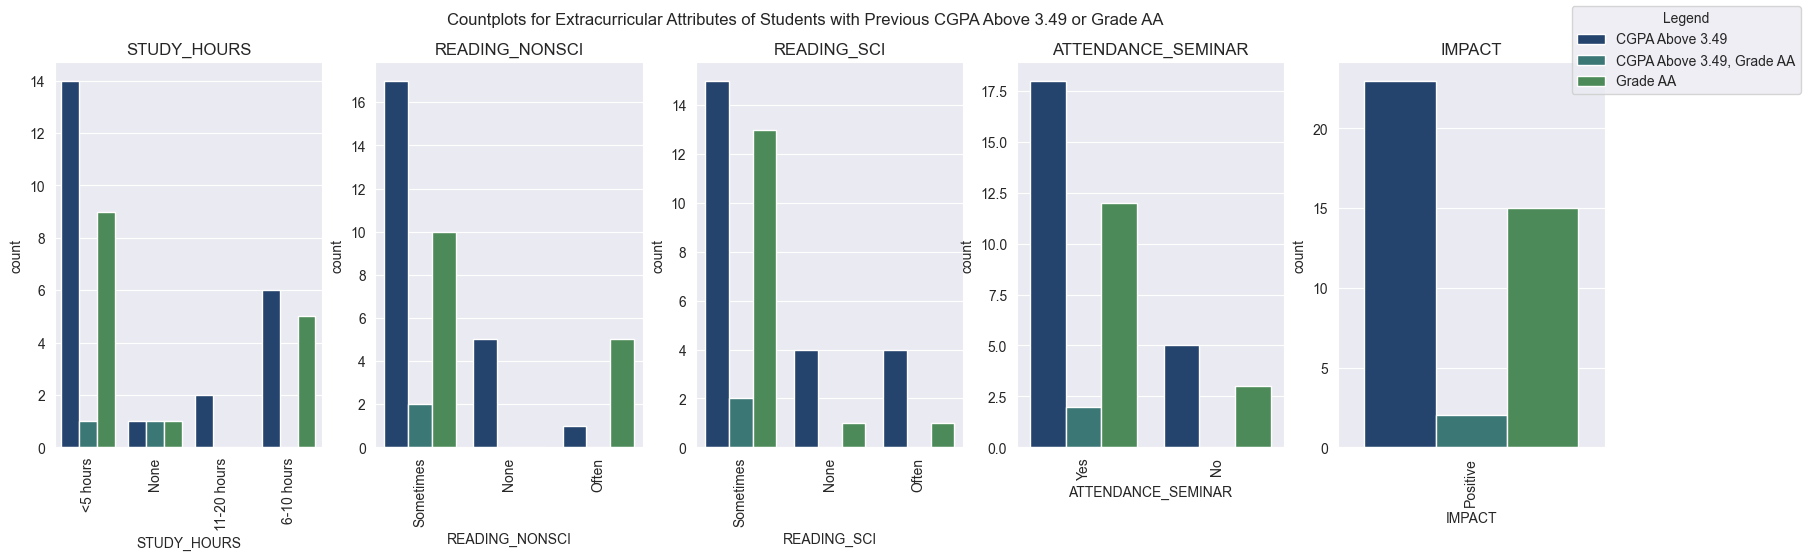

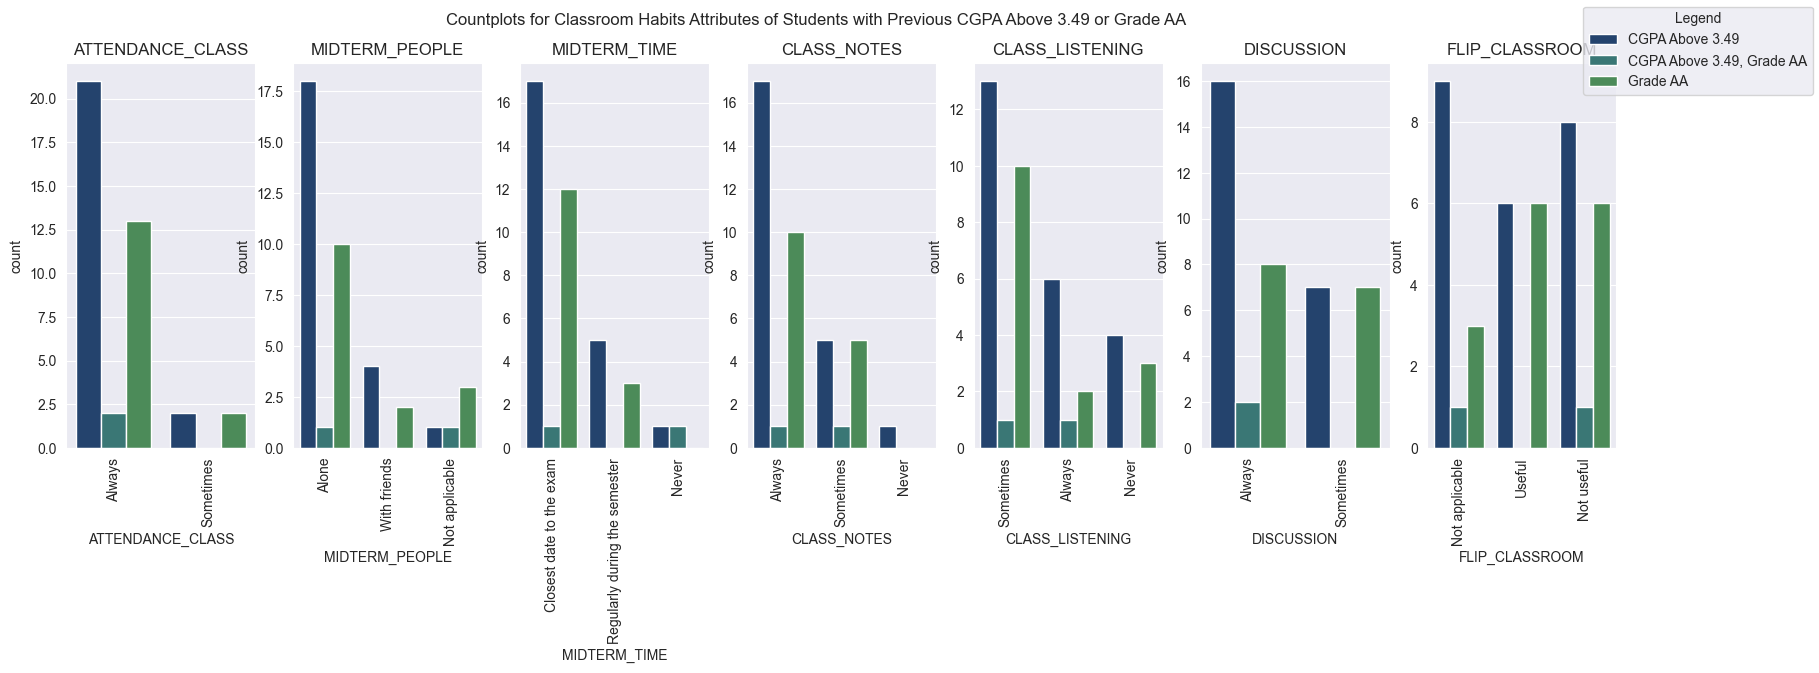

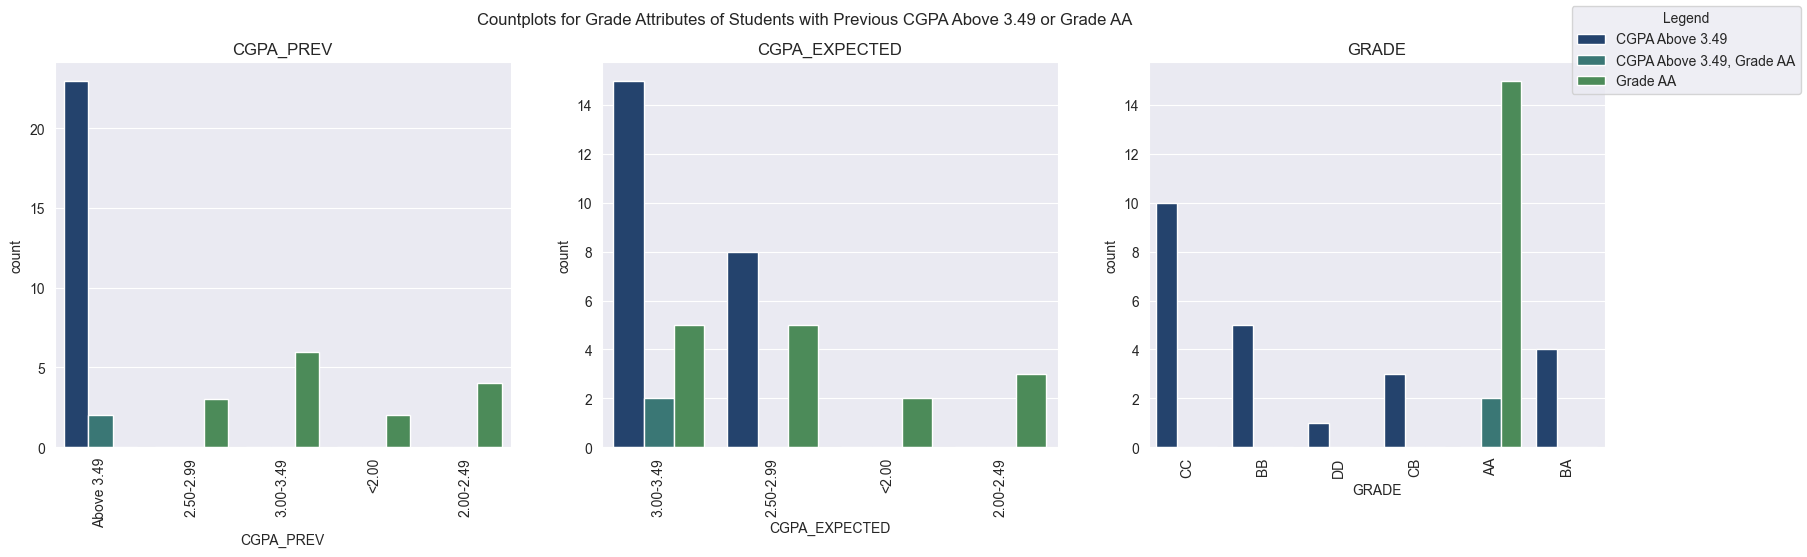

In [41]:
# Analysis of students with previous CGPA above 3.49

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(edu_extra[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_extra[1:]):
    sns.countplot(x=col, hue = 'TYPE_TOP', data=students_top, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')

fig.suptitle('Countplots for Extracurricular Attributes of Students with Previous CGPA Above 3.49 or Grade AA')
plt.show()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(edu_habits[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_habits[1:]):
    sns.countplot(x=col, hue = 'TYPE_TOP', data=students_top, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')
    
fig.suptitle('Countplots for Classroom Habits Attributes of Students with Previous CGPA Above 3.49 or Grade AA')
plt.show()

edu_grades = ['STUDENT ID', 'CGPA_PREV', 'CGPA_EXPECTED', 'GRADE']
fig, axes = plt.subplots(nrows=1, ncols=len(edu_grades[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(edu_grades[1:]):
    sns.countplot(x=col, hue = 'TYPE_TOP', data=students_top, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')
    
fig.suptitle('Countplots for Grade Attributes of Students with Previous CGPA Above 3.49 or Grade AA')
plt.show()

### Home-environment and academic performance

In [42]:
# seeing if different family backgrounds and accomodation types make a difference

In [43]:
students_home = df[family + edu_info]
students_home

,STUDENT ID,MOTHER_EDUCATION,FATHER_EDUCATION,SIBLINGS,PARENTAL_STATUS,MOTHER_JOB,FATHER_JOB,STUDENT ID,CGPA_PREV,CGPA_EXPECTED,COURSE ID,GRADE
0,STUDENT1,Primary school,Secondary school,3,Married,Housewife,Other,STUDENT1,<2.00,<2.00,1,DD
1,STUDENT2,Secondary school,High school,2,Married,Housewife,Retired,STUDENT2,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,Secondary school,Secondary school,2,Married,Housewife,Retired,STUDENT3,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,Primary school,Secondary school,5 or above,Married,Housewife,Retired,STUDENT4,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,High school,High school,2,Married,Housewife,Self-employment,STUDENT5,2.00-2.49,2.00-2.49,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,Primary school,Secondary school,2,Divorced,Housewife,Self-employment,STUDENT141,2.50-2.99,2.50-2.99,9,BB
141,STUDENT142,Primary school,Primary school,5 or above,Married,Housewife,Retired,STUDENT142,Above 3.49,2.50-2.99,9,BB
142,STUDENT143,High school,University,4,Married,Housewife,Self-employment,STUDENT143,3.00-3.49,2.50-2.99,9,DD
143,STUDENT144,University,University,1,Married,Government officer,Private sector employee,STUDENT144,Above 3.49,2.50-2.99,9,CB


Text(0.5, 0.98, 'Countplots for Family Attributes by previous CGPA')

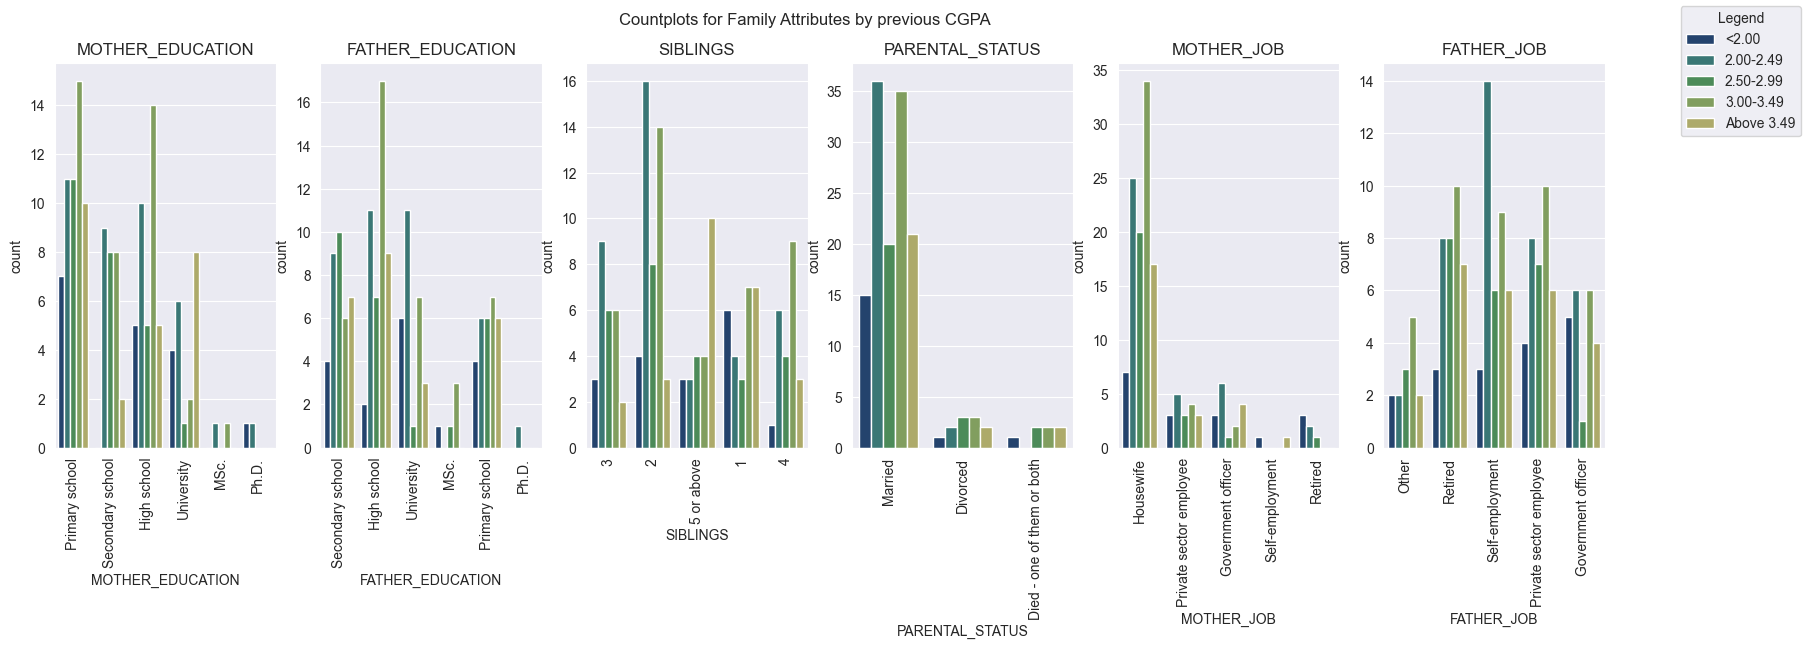

In [44]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(family[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(family[1:]):
    sns.countplot(x=col, data=students_home, hue='CGPA_PREV', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')
    
fig.suptitle('Countplots for Family Attributes by previous CGPA')

Text(0.5, 0.98, 'Countplots for Family Attributes by Grade')

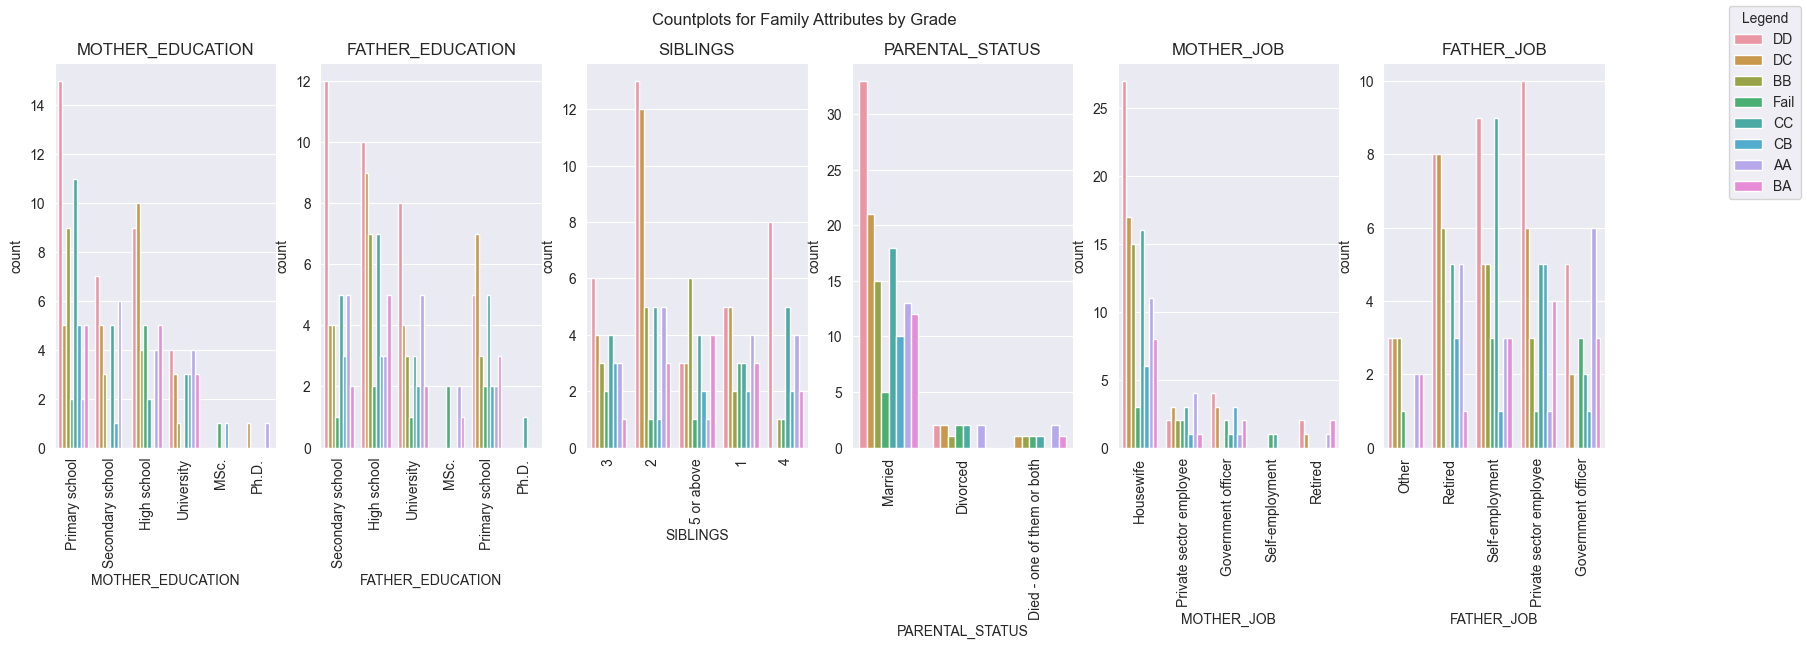

In [45]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(family[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(family[1:]):
    sns.countplot(x=col, data=students_home, hue='GRADE', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')
    
fig.suptitle('Countplots for Family Attributes by Grade')

### Personal habits

In [46]:
students_personal = df[personal + edu_extra + edu_info]

Text(0.5, 0.98, 'Countplots for Personal Attributes by Previous CGPA')

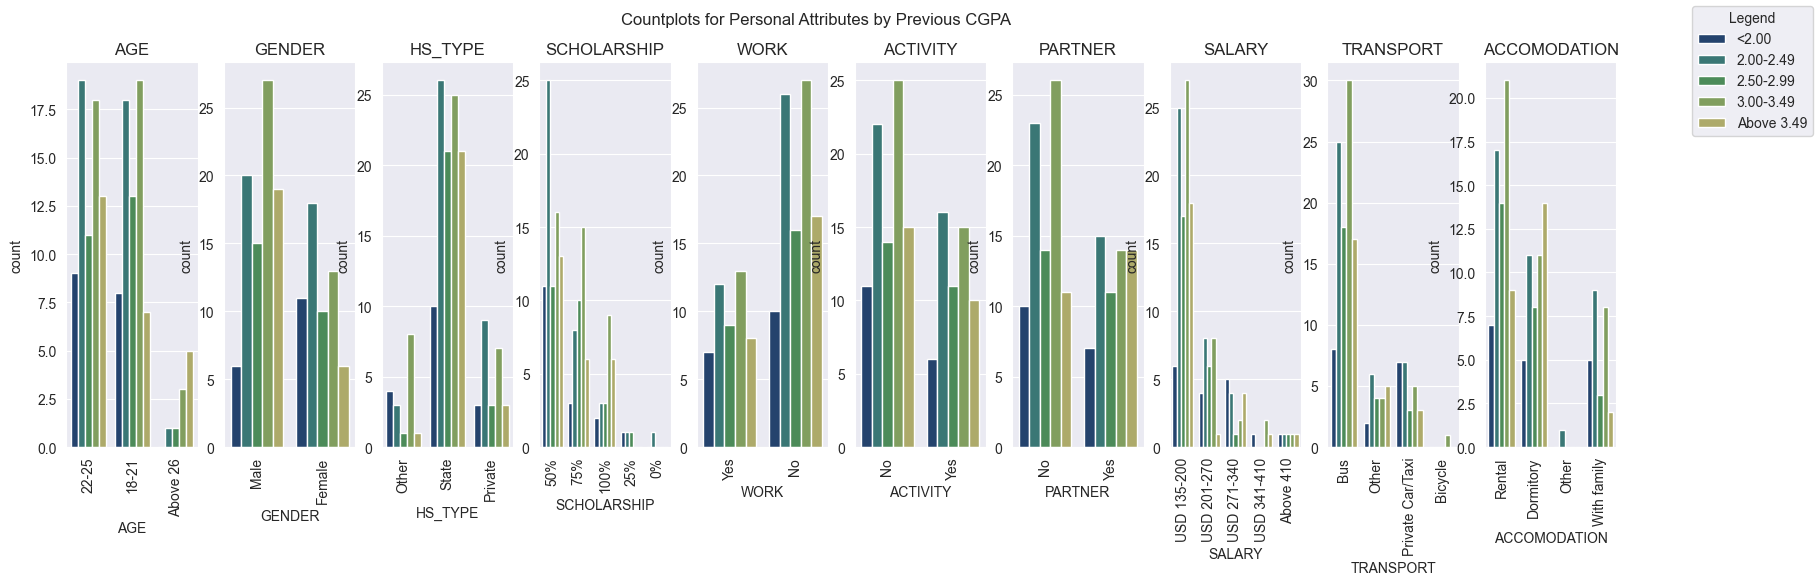

In [47]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(personal[1:]), figsize=(20, 5))

# Create countplots using a for loop
for i, col in enumerate(personal[1:]):
    ax = sns.countplot(x=col, data=students_personal, hue='CGPA_PREV', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')

fig.suptitle('Countplots for Personal Attributes by Previous CGPA')

# fig, axes = plt.subplots(nrows=1, ncols=len(edu_grades[1:]), figsize=(20, 5))

# # Create countplots using a for loop
# for i, col in enumerate(edu_grades[1:]):
#     sns.countplot(x=col, data=students_home, hue='ACCOMODATION', ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
#     axes[i].get_legend().remove()

# handles, labels = axes[-1].get_legend_handles_labels()
# fig.legend(handles, labels, title='Legend', loc='upper right')
    
# fig.suptitle('Countplots for Grade Attributes')

Text(0.5, 0.98, 'Countplots for Personal Attributes by Grade')

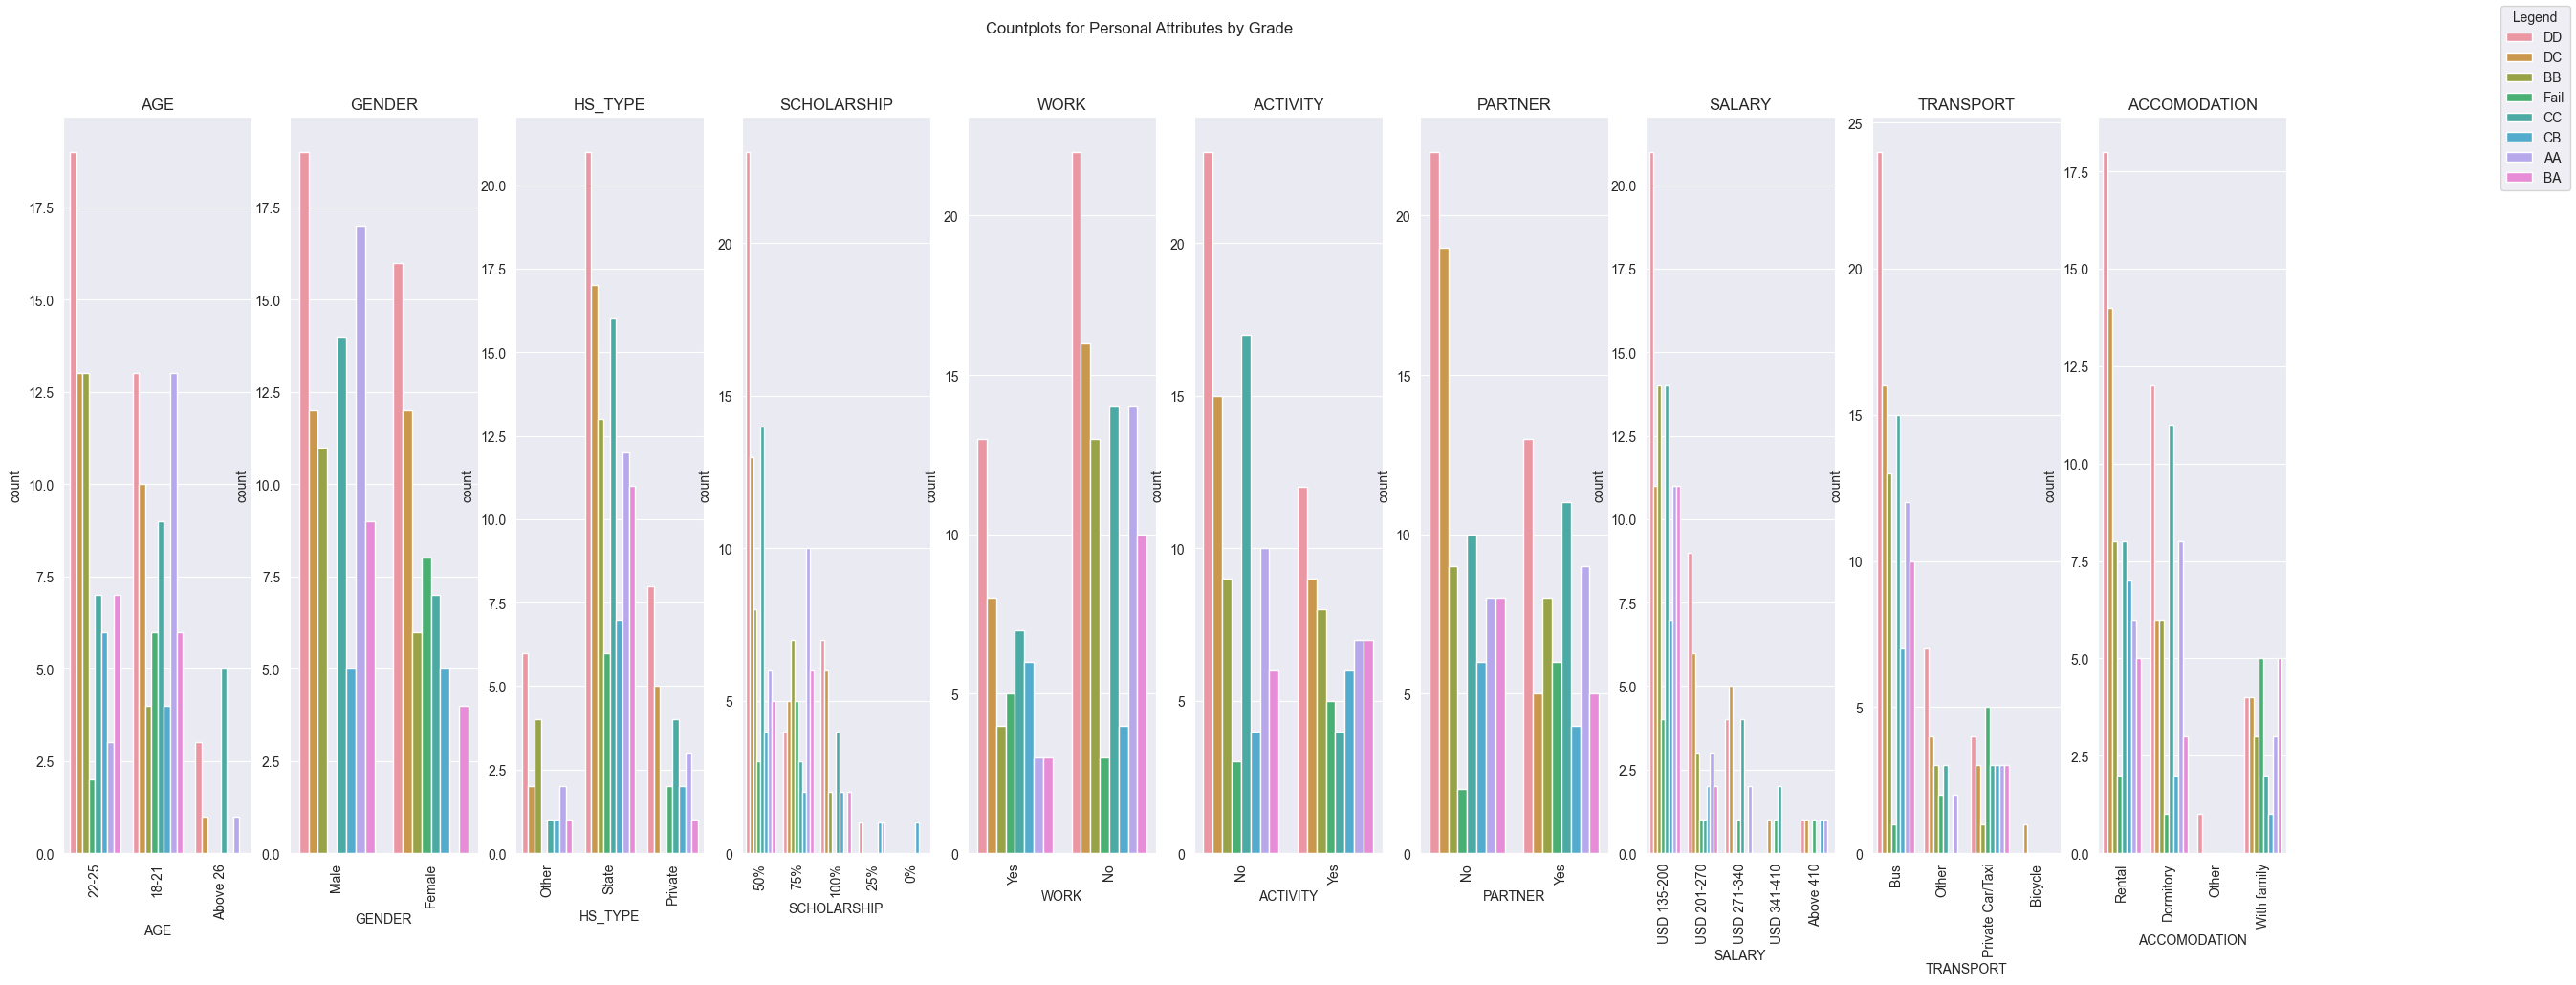

In [50]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(personal[1:]), figsize=(30, 10))

# Create countplots using a for loop
for i, col in enumerate(personal[1:]):
    ax = sns.countplot(x=col, data=students_personal, hue='GRADE', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].get_legend().remove()

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='Legend', loc='upper right')

fig.suptitle('Countplots for Personal Attributes by Grade')